In [4]:
import pandas as pd

filelocation = "nutritional content.csv"
df = pd.read_csv(filelocation)
df

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [5]:
from sklearn.preprocessing import StandardScaler

features = ['prot', 'sodium', 'carb', 'cal']

x = df.loc[:, features].values
y = df.loc[:,['brand']].values

In [6]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2']) 
finalDf = pd.concat([principalDf, df[['brand']]], axis = 1)
print(principalDf) 


     principal component 1  principal component 2
0               -23.507066               1.064872
1               -23.217753               0.975473
2               -23.044779              -0.295217
3               -22.539104               0.027712
4               -22.515943               1.216963
..                     ...                    ...
295               3.071654              -1.455443
296               1.720253              -1.122137
297               3.681278              -1.326196
298               2.416064              -2.332555
299               3.535302              -2.525118

[300 rows x 2 columns]


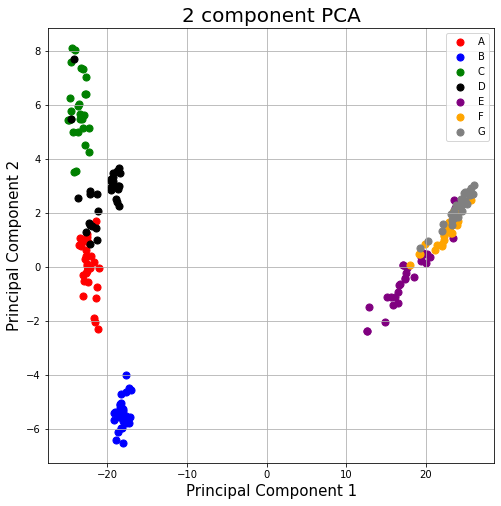

In [7]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (8,8)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 component PCA', fontsize = 20)
targets = ['A', 'B', 'C','D','E','F','G'] 
colors = ['red', 'blue', 'green','black','purple','orange','grey']
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['brand'] == target 
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
           finalDf.loc[indicesToKeep, 'principal component 2'], 
           c = color, s = 50) 
ax.legend(targets)
ax.grid()